In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
g_table = pd.read_csv('../Output/Task2_step4.csv')
g_table.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,2.0,1.0,10.0,10.0,0.7,1,0,1.0,0,0,0,-1.0,0.700000,1.0,0.0,6016.7120
1,1.0,1.0,2.0,1.0,10.0,10.0,0.7,2,0,1.0,0,1,0,-1.0,0.756757,1.0,0.0,6733.3740
2,1.0,1.0,2.0,1.0,10.0,10.0,0.7,3,0,1.0,0,2,0,-1.0,0.805755,1.0,0.0,7383.4022
3,1.0,1.0,2.0,1.0,10.0,10.0,0.7,4,0,1.0,0,3,0,-1.0,0.846881,1.0,0.0,8000.0214
4,1.0,1.0,2.0,1.0,10.0,10.0,0.7,5,0,1.0,0,4,0,-1.0,0.880590,1.0,0.0,8716.7231


In [56]:
action = g_table.loc[(g_table['action_type'] == 1)]
bins = np.linspace(0, 1, 21)
data = np.array(action['posterior'].to_list())
digitized = np.digitize(data, bins)
bin_means_b = [data[digitized == i].mean() for i in range(1, len(bins))]

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] < 0.5)]
data = np.array(action['posterior'].to_list())
digitized = np.digitize(data, bins)
bin_means_r = [data[digitized == i].mean() for i in range(1, len(bins))]

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] >= 0.5)]
data = np.array(action['posterior'].to_list())
digitized = np.digitize(data, bins)
bin_means_bu = [data[digitized == i].mean() for i in range(1, len(bins))]

<ipython-input-56-1b73fde201a3>:15: RuntimeWarning: Mean of empty slice.
  bin_means_bu = [data[digitized == i].mean() for i in range(1, len(bins))]
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


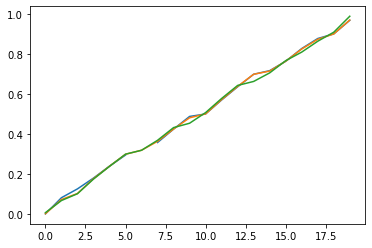

In [57]:
plt.plot(bin_means_bu)
plt.plot(bin_means_b)
plt.plot(bin_means_r)

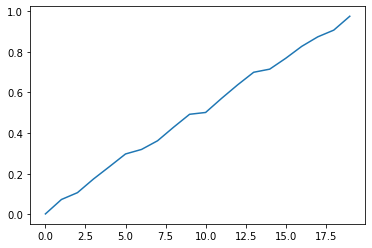